In [453]:
import pandas as pd
import numpy as np
import math
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from urllib.request import urlopen

In [454]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler

In [455]:
data=pd.read_csv('UCI_Credit_Card.csv')

In [456]:
data.shape

(15000, 25)

In [457]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
GENDER                        int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default.payment.next.month    int64
dtype: object

In [458]:
data.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
1,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
2,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
3,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [459]:
# DROPPING ID 
data=data.drop('ID',axis=1)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Removed ID Column</span>
</div>

In [460]:
data.isnull().sum()

LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [461]:
data.isna().sum()

LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [462]:
data['default']=data['default.payment.next.month']

In [463]:
data=data.drop('default.payment.next.month',axis=1)

In [464]:
data.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
1,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
2,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [465]:
X=data.drop('default',axis=1)
Y=data['default']

## Normalizing data using Standard Scaler

In [466]:
scl=StandardScaler()
X=scl.fit_transform(X)
# Scaling the data
# plt.figure(figsize=(15,5))
# plt.boxplot(X.transpose(),labels=feat)
# plt.show

## Check for imbalance in the data 


In [467]:
Targetratio=data.default.value_counts()/len(data)
Targetratio

0    0.781133
1    0.218867
Name: default, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

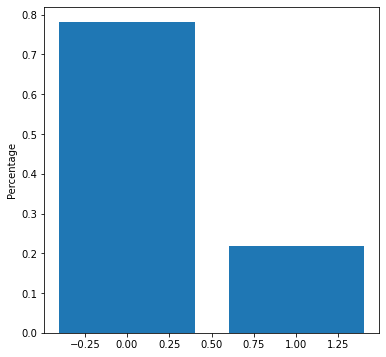

In [468]:
plt.figure(figsize=(6,6))
plt.bar(Targetratio.index,Targetratio)
plt.ylabel('Percentage')
plt.show

## Train and Test Splits

In [469]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [470]:
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", Y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (12000, 23)
Number transactions y_train dataset:  (12000,)
Number transactions X_test dataset:  (3000, 23)
Number transactions y_test dataset:  (3000,)


## Applying SMOTE ON DATA as Data is Imbalanced

In [471]:
print("Before OverSampling, count of label '0':{}".format(sum(Y_train==0)))
print("Before OverSampling, count of label '1':{}".format(sum(Y_train==1)))

#!pip install imblearn
#import imblearn
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=2)
X_train_res,Y_train_res=smt.fit_sample(X_train,Y_train.ravel())
X_train=X_train_res
Y_train=Y_train_res
print('After OverSampling, the shape of train_X:{}'.format(X_train.shape))
print('After OverSampling, the shape of train_Y:{} \n'.format(Y_train.shape))

print("After Oversampling, count of label '0':{}".format(sum(Y_train==0)))
print("After Oversampling, count of label '1':{}".format(sum(Y_train==1)))

Before OverSampling, count of label '0':9341
Before OverSampling, count of label '1':2659
After OverSampling, the shape of train_X:(18682, 23)
After OverSampling, the shape of train_Y:(18682,) 

After Oversampling, count of label '0':9341
After Oversampling, count of label '1':9341


## Logistic_Regression

In [472]:
log=LogisticRegression()
log.fit(X_train,Y_train)
pred_log=log.predict(X_test)
acc_log=accuracy_score(pred_log,Y_test)
print('Logistic Accuacy Score',acc_log)

Logistic Accuacy Score 0.6783333333333333


In [473]:
#R2 value
log.score(X_train,Y_train)


0.6746065731720372

In [474]:
log.coef_

array([[-0.12264245, -0.06963225, -0.09879279, -0.11302182,  0.065792  ,
         0.60273692,  0.09527487,  0.05790771,  0.0616666 , -0.00157609,
        -0.03172648, -0.33845187, -0.21485159,  0.31158609,  0.00192457,
         0.1682038 ,  0.02000135, -0.27553243, -0.24250011, -0.16018442,
        -0.11533384, -0.0653337 , -0.02552921]])

In [475]:
print('Confusion matrix of Logistic is:\n',confusion_matrix(pred_log, Y_test))

Confusion matrix of Logistic is:
 [[1657  246]
 [ 719  378]]


In [476]:
log_f1=f1_score(pred_log,Y_test)
print('F1 score of logistic is:',log_f1)


F1 score of logistic is: 0.4392794886693782


## DecisionTreeClassifier

In [477]:
dec=DecisionTreeClassifier()
dec.fit(X_train,Y_train)
pred_dec=dec.predict(X_test)
acc_dec_log=accuracy_score(pred_dec,Y_test)
print('DecisionTree Accuracy Score',acc_dec_log)

DecisionTree Accuracy Score 0.7073333333333334


In [478]:
print('Confusion matrix of DecisionTree is:\n',confusion_matrix(pred_dec, Y_test))

Confusion matrix of DecisionTree is:
 [[1849  351]
 [ 527  273]]


In [479]:
DT_f1=f1_score(pred_dec,Y_test)
print('F1 score of DecisionTree is:',DT_f1)


F1 score of DecisionTree is: 0.3834269662921348


In [480]:
X1=data.drop('default',axis=1)
feat_labels=X1.columns

feature_importance_DT=pd.DataFrame({"FeatureDT":feat_labels,"ImportanceDT":dec.feature_importances_}).sort_values("ImportanceDT",ascending=False)
feature_importance_DT

,FeatureDT,ImportanceDT
5,PAY_0,0.212905
0,LIMIT_BAL,0.143836
4,AGE,0.063319
11,BILL_AMT1,0.057020
22,PAY_AMT6,0.051591
18,PAY_AMT2,0.041451
12,BILL_AMT2,0.040350
13,BILL_AMT3,0.037345
16,BILL_AMT6,0.036492
20,PAY_AMT4,0.034495


## *******TOP 5 Features of Decision Tree
PAY_0, LIMIT_BAL, AGE, BILL_AMT1, PAY_AMT6

##  RandomForestClassifier

In [481]:
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,Y_train)
pred_rfc=rfc.predict(X_test)
acc_rfc_log=accuracy_score(pred_rfc,Y_test)
print('Random Forest Classifier',acc_rfc_log)



Random Forest Classifier 0.7913333333333333


In [482]:
print('Confusion matrix of RandomForest is:\n',confusion_matrix(pred_rfc, Y_test))

Confusion matrix of RandomForest is:
 [[2113  363]
 [ 263  261]]


In [483]:
RF_f1=f1_score(pred_rfc,Y_test)
print('F1 score of RandomForest is:',RF_f1)

F1 score of RandomForest is: 0.45470383275261333


In [484]:
#------- Method2--------
# importance=rfc.feature_importances_

# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' %(i+1))
    
# #pyplot Feature importance
# plt.bar([x for x in range(len(importance))],importance)
# plt.show()

In [485]:
#-----------Method3-----------
# feature selection using RandomForest Classifier
# It is a good practise to select features from training dataset to avoid overfitting
# from sklearn.feature_selection import SelectFromModel
# sel=SelectFromModel(RandomForestClassifier(n_estimators=100))
# sel.fit(X_train,Y_train)
# sel.get_support() ## it will get the array of values with True or False if the feature is important

# selected_feat=feat_labels[(sel.get_support(indices=True))]
# print(selected_feat)

In [486]:
feature_importance_rf=pd.DataFrame({"feature":feat_labels,"Importance":rfc.feature_importances_}).sort_values("Importance",ascending=False)
feature_importance_rf

,feature,Importance
5,PAY_0,0.114061
0,LIMIT_BAL,0.076601
4,AGE,0.060668
17,PAY_AMT1,0.050941
11,BILL_AMT1,0.049132
22,PAY_AMT6,0.048109
18,PAY_AMT2,0.047598
6,PAY_2,0.044645
19,PAY_AMT3,0.044227
12,BILL_AMT2,0.044216


## ***********TOP 5 Features in Random Forest
PAY_0, LIMIT_BAL, AGE, PAY_AMT1, BILL_AMT1

## KNN Classifier

In [487]:
knn3=KNeighborsClassifier(n_neighbors=3)
knn4=KNeighborsClassifier(n_neighbors=4)
knn5=KNeighborsClassifier(n_neighbors=5)
knn6=KNeighborsClassifier(n_neighbors=6)
knn3.fit(X_train,Y_train)
knn4.fit(X_train,Y_train)
knn5.fit(X_train,Y_train)
knn6.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

## KNN Accuracy Scores

<div style="background-color:##EDF9FF">
  <ul><li><h3> KNN With 3 Neighbors</h3></li></ul>
</div>

In [488]:
pred3=knn3.predict(X_test)
acc_score_knn=accuracy_score(pred3,Y_test)
print('KNN with 3 Neighbors accuracy is ',acc_score_knn)

KNN with 3 Neighbors accuracy is  0.676


In [489]:
print('Confusion matrix of KNN3 is:\n',confusion_matrix(pred3, Y_test))

Confusion matrix of KNN3 is:
 [[1678  274]
 [ 698  350]]


In [490]:
KNN3_f1=f1_score(pred3,Y_test)
print('F1 score of KNN3 is:',KNN3_f1)

F1 score of KNN3 is: 0.4186602870813397


<div style="background-color:##EDF9FF">
  <ul><li><h3> KNN With 4 Neighbors</h3></li></ul>
</div>

In [491]:
pred4=knn4.predict(X_test)
acc_score_knn=accuracy_score(pred4,Y_test)
print('KNN with 4 Neighbors accuracy is ',acc_score_knn)

KNN with 4 Neighbors accuracy is  0.717


In [492]:
print('Confusion matrix of KNN4 is:\n',confusion_matrix(pred4, Y_test))

Confusion matrix of KNN4 is:
 [[1838  311]
 [ 538  313]]


In [493]:
KNN4_f1=f1_score(pred4,Y_test)
print('F1 score of KNN4 is:',KNN4_f1)

F1 score of KNN4 is: 0.4244067796610169


<div style="background-color:##EDF9FF">
  <ul><li><h3> KNN With 5 Neighbors</h3></li></ul>
</div>

In [494]:
pred5=knn5.predict(X_test)
acc_score_knn=accuracy_score(pred5,Y_test)
print('KNN with 5 Neighbors accuracy is ',acc_score_knn)

KNN with 5 Neighbors accuracy is  0.6603333333333333


In [495]:
print('Confusion matrix of KNN5 is:\n',confusion_matrix(pred5, Y_test))

Confusion matrix of KNN5 is:
 [[1608  251]
 [ 768  373]]


In [496]:
KNN5_f1=f1_score(pred5,Y_test)
print('F1 score of KNN5 is:',KNN5_f1)

F1 score of KNN5 is: 0.4226628895184136


<div style="background-color:##EDF9FF">
  <ul><li><h3> KNN With 6 Neighbors</h3></li></ul>
</div>

In [497]:
pred6=knn6.predict(X_test)
acc_score_knn=accuracy_score(pred6,Y_test)
print('KNN with 6 Neighbors accuracy is ',acc_score_knn)

KNN with 6 Neighbors accuracy is  0.7083333333333334


In [498]:
print('Confusion matrix of KNN6 is:\n',confusion_matrix(pred6, Y_test))

Confusion matrix of KNN6 is:
 [[1782  281]
 [ 594  343]]


In [499]:
KNN6_f1=f1_score(pred6,Y_test)
print('F1 score of KNN6 is:',KNN6_f1)

F1 score of KNN6 is: 0.4394618834080717


<div style="background-color:##EDF9FF">
              <ul><li><h3>**********KNN With 4 Neighbors has best accuracy***********</h3></li></ul>
</div>

## Naive_Bayes Classifier

<div style="background-color:##EDF9FF">
              <ul><li><h3>Gaussian & its Accuracy scores</h3></li></ul>
</div>

In [500]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [501]:
predGNB=gnb.predict(X_test)
accu_score=accuracy_score(Y_test,predGNB)
print('GaussianNB accuracy is',accu_score)

GaussianNB accuracy is 0.39666666666666667


In [502]:
print('Confusion matrix of GNB is:\n',confusion_matrix(predGNB, Y_test))

Confusion matrix of GNB is:
 [[ 656   90]
 [1720  534]]


In [503]:
GNB_f1=f1_score(predGNB,Y_test)
print('F1 score of GNB is:',GNB_f1)

F1 score of GNB is: 0.3710910354412787


<div style="background-color:##EDF9FF">
              <ul><li><h3>Bernoulli & its Accuracy scores</h3></li></ul>
</div>

In [504]:
bnb=BernoulliNB()
bnb.fit(X_train,Y_train)
predBNB=bnb.predict(X_test)
accu_score=accuracy_score(Y_test,predBNB)
print('BernoulliNB accuracy is',accu_score)

BernoulliNB accuracy is 0.5523333333333333


In [505]:
print('Confusion matrix of BNB is:\n',confusion_matrix(predBNB, Y_test))

Confusion matrix of BNB is:
 [[1281  248]
 [1095  376]]


In [506]:
BNB_f1=f1_score(predBNB,Y_test)
print('F1 score of BNB is:',BNB_f1)

F1 score of BNB is: 0.3589498806682577


## Support Vector Machines

 i am getting 
    TypeError: must be real number, not str 
        error

In [511]:
# svc_def=SVC(C='10',kernel='linear')

# svc_def.fit(X_train,Y_train)
# pred=svc_def.predict(X_test)
# accu_score=accuracy_score(pred,Y_test)

In [512]:
# svc_def=SVC(C='10',kernel='rbf',gamma='scale')
# svc_def.fit(X_train,Y_train)
# pred=svc_def.predict(X_test)
# accu_score=accuracy_score(pred,Y_test)

In [ ]:
#SVM is not working for me

## *******************CONCLUSIONS********************

ANS1: SMOTE HAS BEEN APPLIED as the data of dependent variable of class 1 is imbalanced

ANS2:  
        Confusion Matrix:
        From the confusion matrixs of all algorithms we can infer that Precision and Accuracy of Random Forest is more
        as the count of True Posities and True Negatives are more in RF
        
        F1 Score:
        Its a harmonic mean of Precision and Recall and give measure of incorrectly classified cases than Accuracy
        
        Since F1 Score of Random Forest is highest it is predicting well 

ANS3:
    
    TOP 5 Features of Decision Tree:
        PAY_0, LIMIT_BAL, AGE, BILL_AMT1, PAY_AMT6
        
    TOP 5 Features in Random Forest:
        PAY_0, LIMIT_BAL, AGE, PAY_AMT1, BILL_AMT1
    
    

ANS4: KNN4 has the best FIT

ANS5: 
    RANDOM FOREST gave the best accuracy